In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import metrics

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def load_data(filename,relative_path="./dataset/",sep="\t"):
    data=pd.read_csv(relative_path+filename,sep=sep).to_numpy()
    return data

# visualisation en 3d
def visualise_data_3d(data):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0],data[:,1],data[:,2])
    plt.show()
    
def visualise_pred_3d(data,pred):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0],data[:,1],data[:,2],c=pred)
    plt.show()
    
#visualisation des données intiales
def visualise_data(data):
    plt.title("Données initiales")
    plt.scatter(data[:,0],data[:,1],s=5)
    plt.show()

def visualise_predict(data,pred):
    plt.title("Visualisation des clusters")
    plt.scatter(data[:,0],data[:,1],c=pred,s=5)
    plt.show()
    

<IPython.core.display.Javascript object>


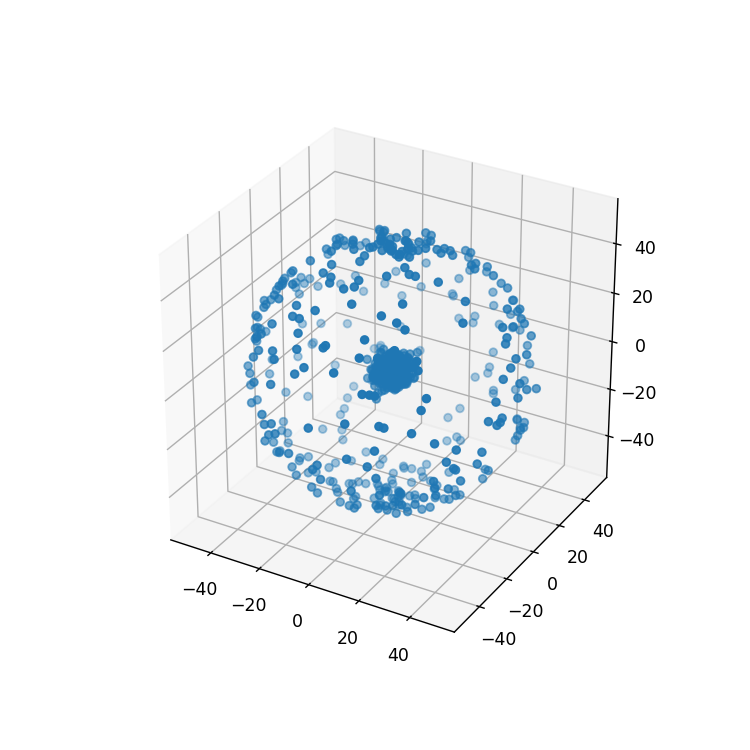

In [3]:
data1=load_data("a.data")
visualise_data_3d(data1)

<IPython.core.display.Javascript object>


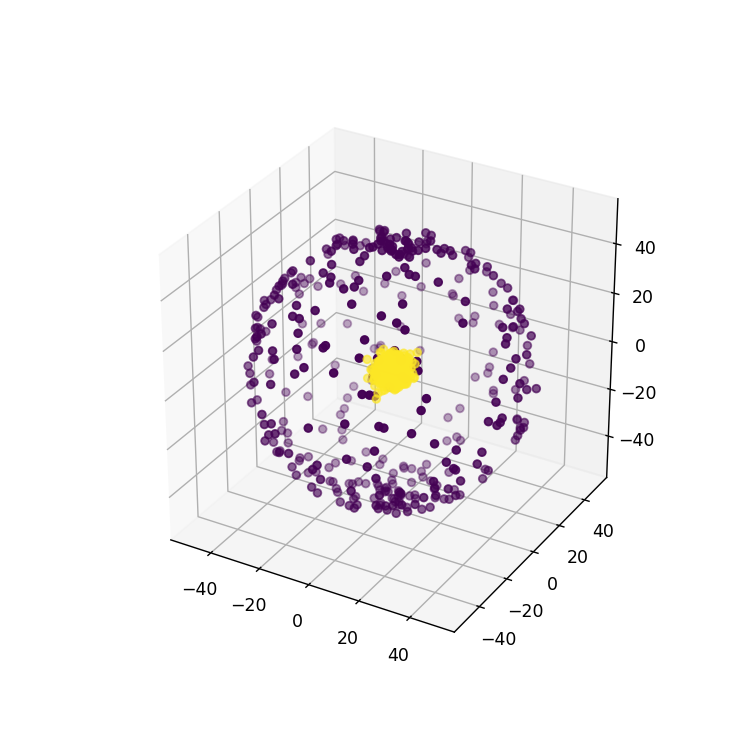

In [4]:
from cdbw import CDbw
def cdbw_n_clusters_agg(min,max,data):
    n_cluster=min
    best=-1
    for k in range(min,max+1,1):
        model = cluster.AgglomerativeClustering(n_clusters=k, linkage='single').fit(data)
        cdbw = CDbw(data, model.labels_, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False)
        if (best<cdbw):
            n_cluster = k
            best = cdbw
    return n_cluster

pred=cluster.AgglomerativeClustering(n_clusters=cdbw_n_clusters_agg(2,5,data1), linkage='single').fit_predict(data1)
visualise_pred_3d(data1,pred)

<IPython.core.display.Javascript object>


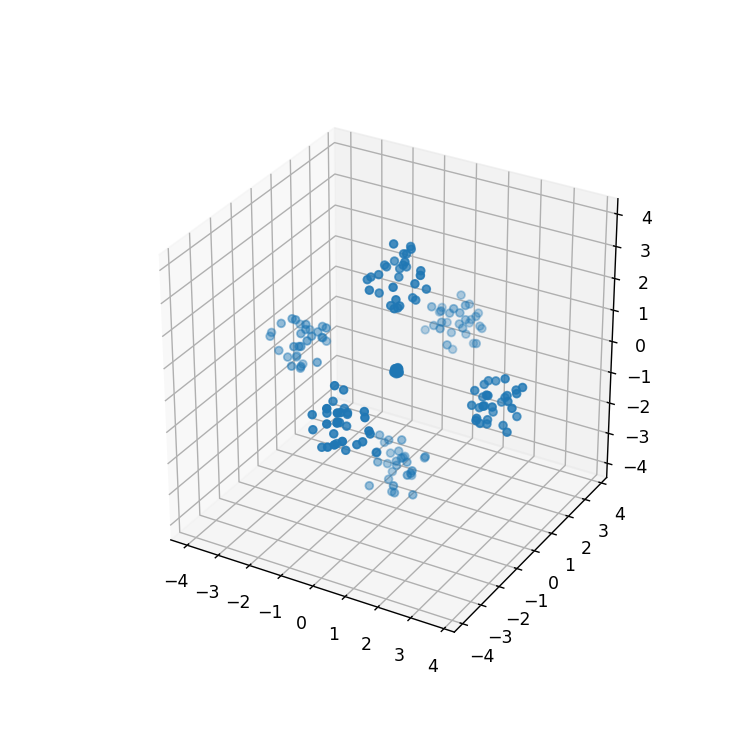

In [5]:
data2=load_data("h.data")
visualise_data_3d(data2)

<IPython.core.display.Javascript object>


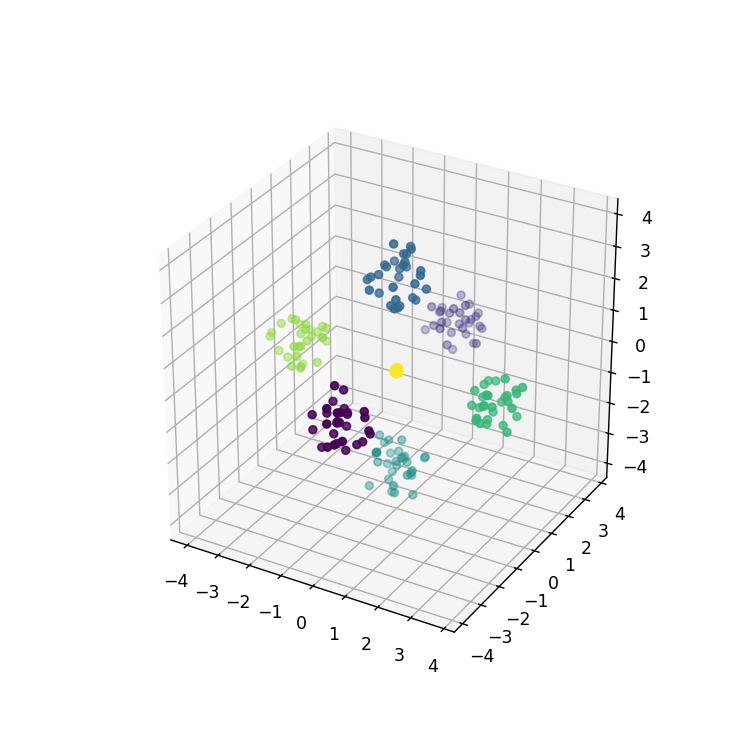

In [6]:
#détermine le nombre de clusters grâce au coéfficient de silhouette
def sil_n_clusters(min,max,data):
    n_cluster=min
    best=-1
    for k in range(min,max+1,1):
        model = cluster.KMeans(n_clusters=k, init='k-means++').fit(data)
        silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
        if (best<silh):
            n_cluster = k
            best = silh
    return n_cluster


pred = cluster.KMeans(n_clusters=sil_n_clusters(2,9,data2),init='k-means++').fit_predict(data2)
visualise_pred_3d(data2,pred)

<IPython.core.display.Javascript object>


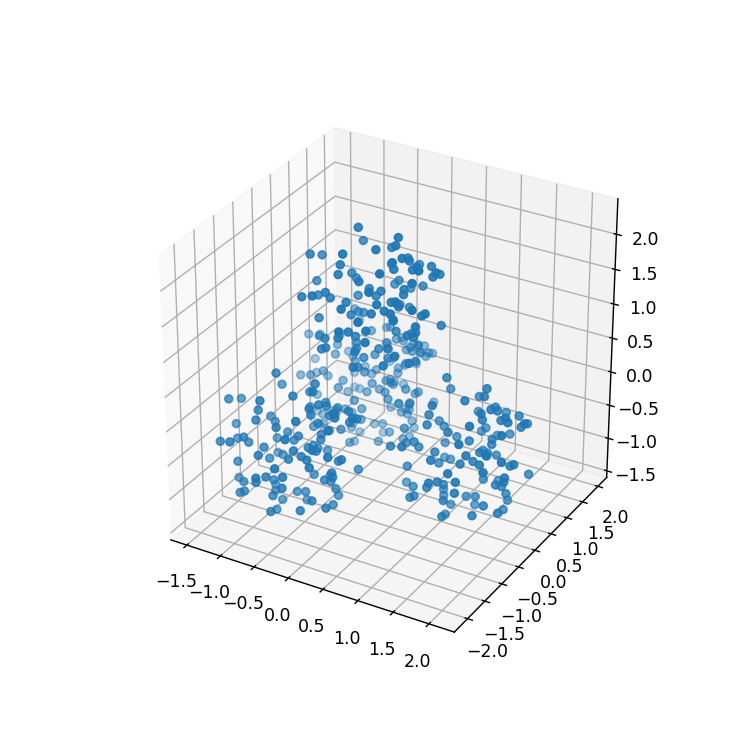

In [7]:
data3=load_data("t.data")
visualise_data_3d(data3)

<IPython.core.display.Javascript object>


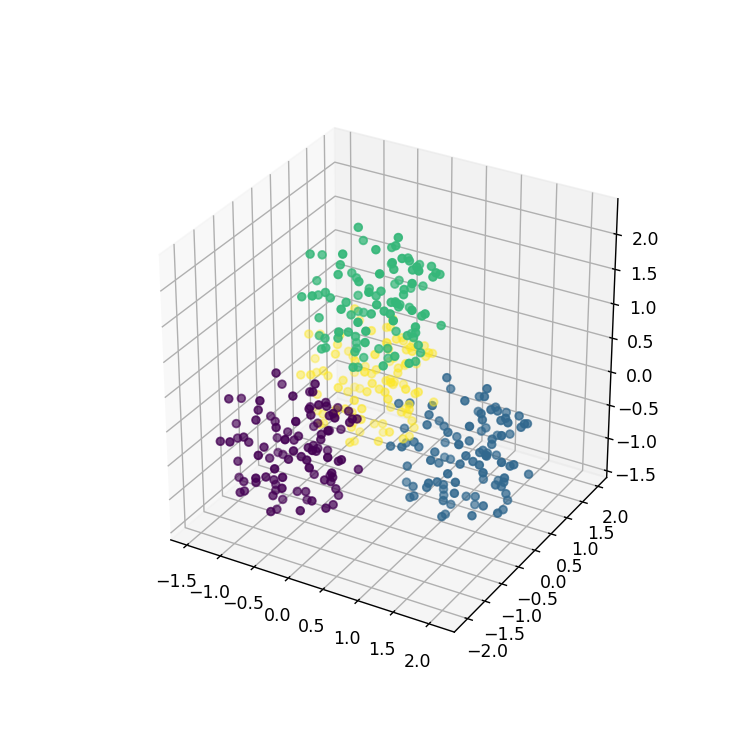

In [8]:
pred = cluster.KMeans(n_clusters=sil_n_clusters(2,9,data3),init='k-means++').fit_predict(data3)
visualise_pred_3d(data3,pred)

<IPython.core.display.Javascript object>


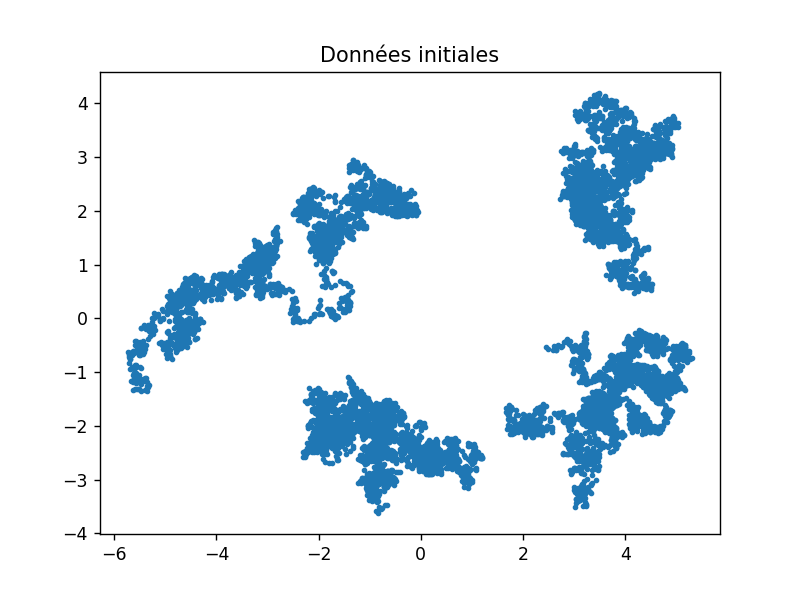

In [9]:
data4=load_data("tr.data",sep=" ")
visualise_data(data4)

<IPython.core.display.Javascript object>


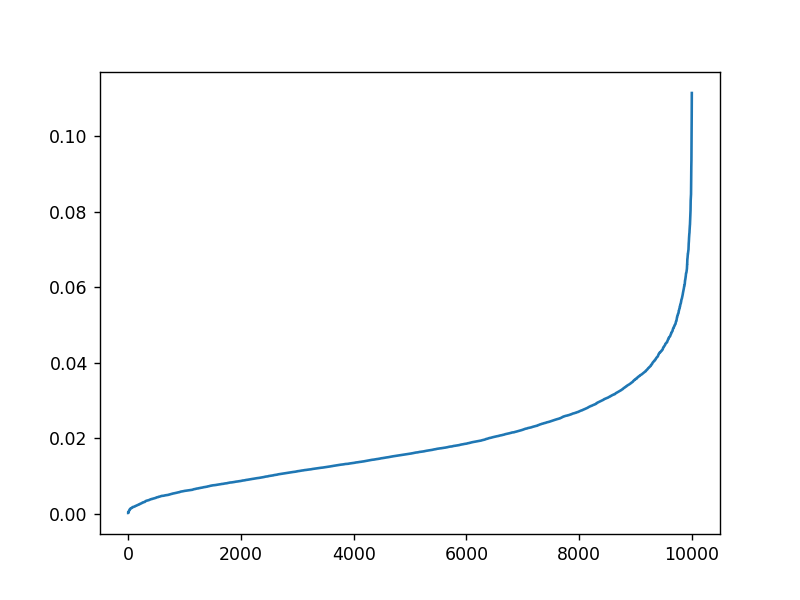

In [10]:
from sklearn.neighbors import NearestNeighbors
def det_eps(data):
    neighbors=NearestNeighbors(n_neighbors=4)
    neighbors_fit=neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()

det_eps(data4)

<IPython.core.display.Javascript object>


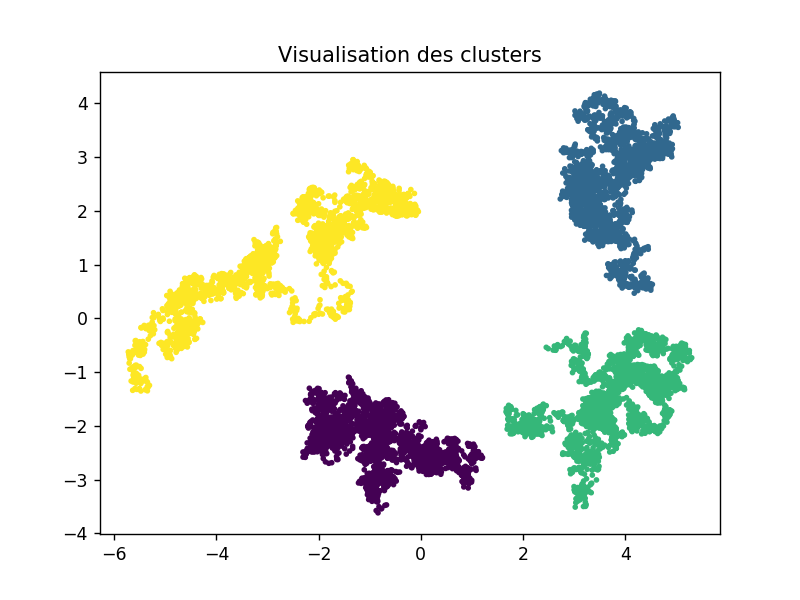

In [11]:
pred=cluster.DBSCAN(eps=0.2, min_samples=2).fit_predict(data4)
visualise_predict(data4,pred)

<IPython.core.display.Javascript object>


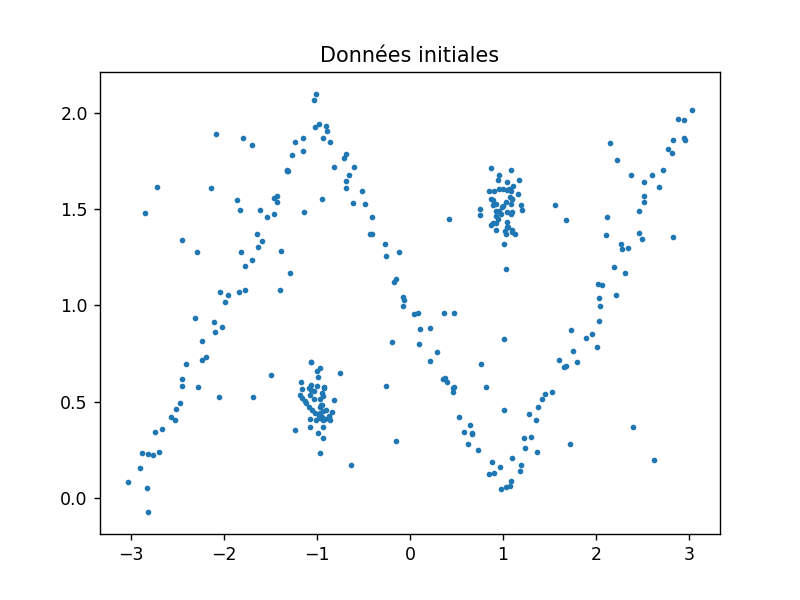

In [12]:
data5=load_data("zgn.data",sep=" ")
visualise_data(data5)

<IPython.core.display.Javascript object>


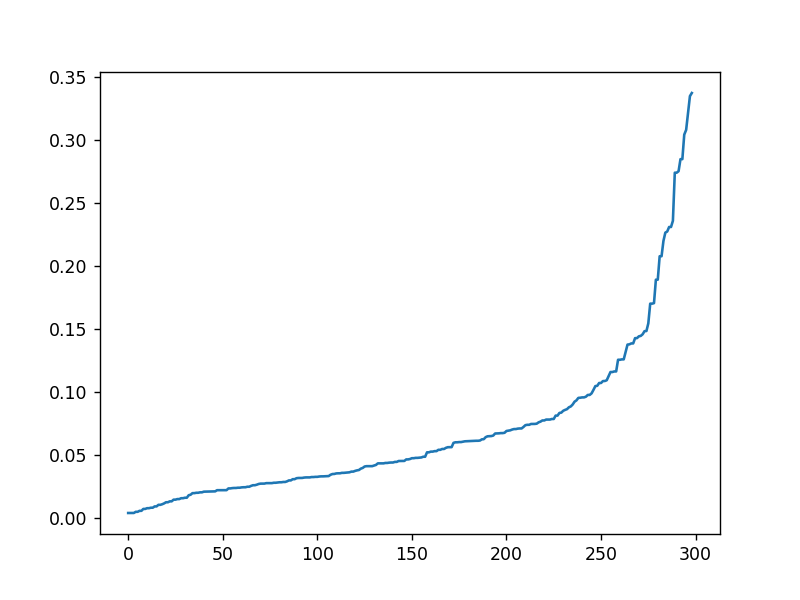

In [13]:
det_eps(data5)

<IPython.core.display.Javascript object>


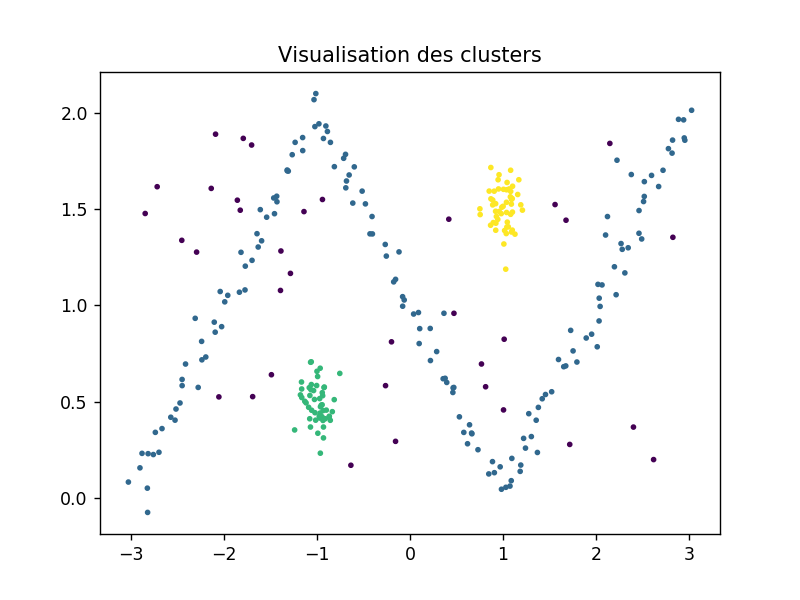

In [27]:
pred=cluster.DBSCAN(eps=0.2, min_samples=4).fit_predict(data5)
visualise_predict(data5,pred)

<IPython.core.display.Javascript object>


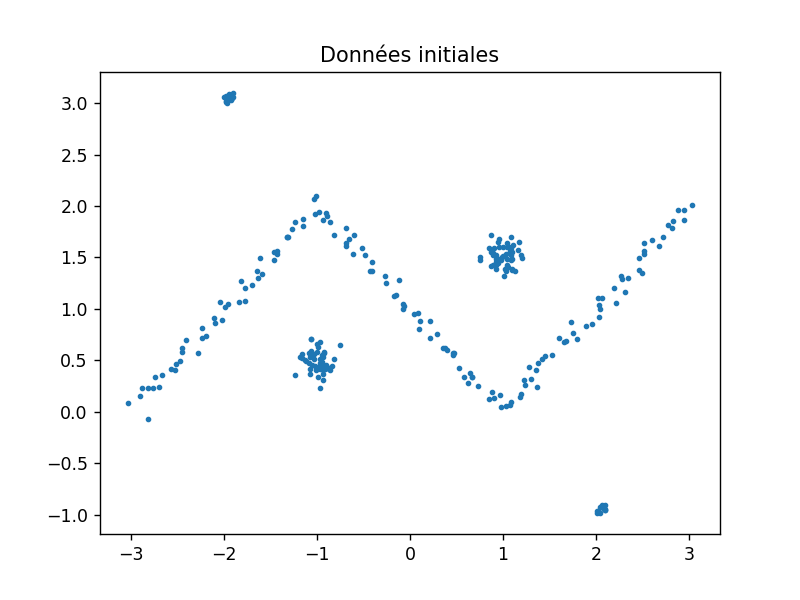

In [30]:
data6=load_data("zgo.data",sep=" ")
visualise_data(data6)

<IPython.core.display.Javascript object>


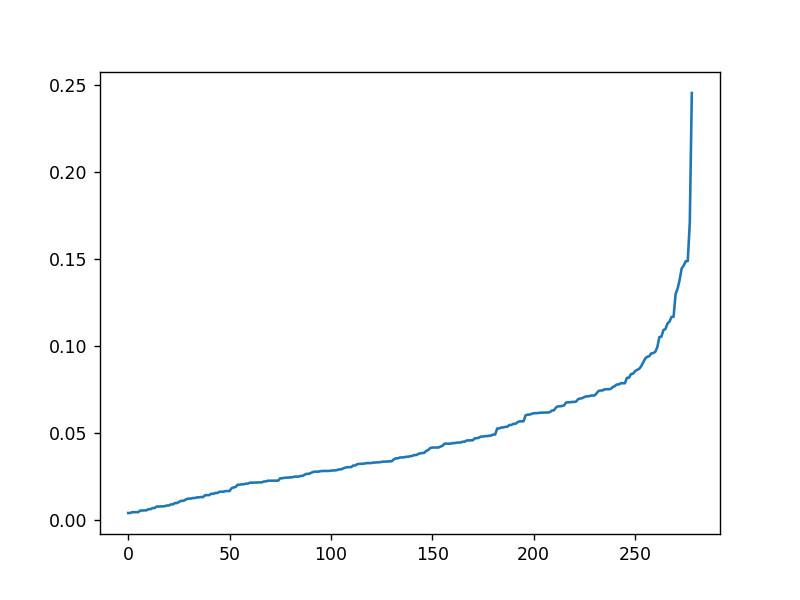

In [33]:
det_eps(data6)

<IPython.core.display.Javascript object>


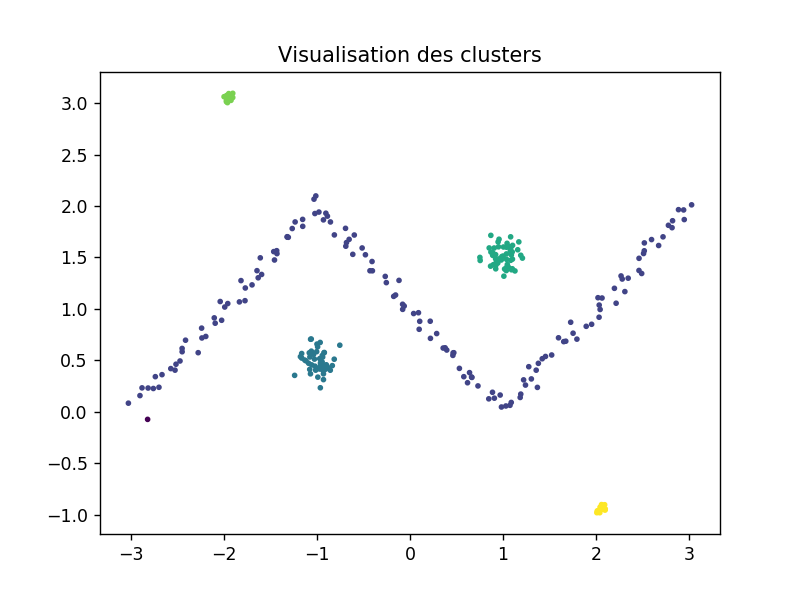

In [34]:
pred=cluster.DBSCAN(eps=0.2, min_samples=4).fit_predict(data6)
visualise_predict(data6,pred)